<a href="https://colab.research.google.com/github/nitishxthakur/DataLab/blob/main/Stationarity_test_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
stock_data=yf.download('AAPL', start='2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02 00:00:00+00:00,184.734970,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03 00:00:00+00:00,183.351746,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04 00:00:00+00:00,181.023178,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05 00:00:00+00:00,180.296707,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08 00:00:00+00:00,184.655365,185.559998,185.600006,181.500000,182.089996,59144500
2024-01-09 00:00:00+00:00,184.237411,185.139999,185.149994,182.729996,183.919998,42841800
2024-01-10 00:00:00+00:00,185.282288,186.190002,186.399994,183.919998,184.350006,46792900
2024-01-11 00:00:00+00:00,184.685226,185.589996,187.050003,183.619995,186.539993,49128400


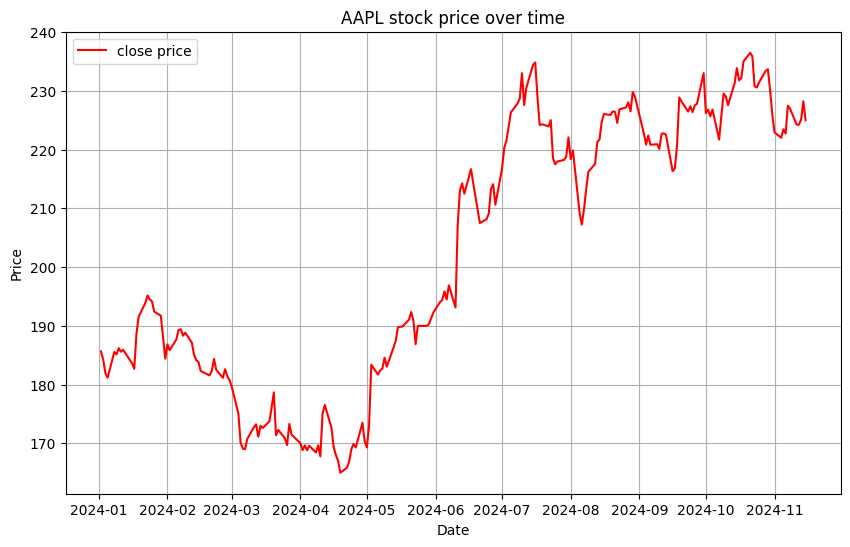

In [10]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='close price', color='red')
plt.title('AAPL stock price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


In [12]:
!pip install statsmodels

In [26]:
from statsmodels.tsa.stattools import adfuller

#Perform the augmented Dickey-Fuller test
adf_test=adfuller(stock_data['Close'])
print('ADF Test Results:')
print(f'ADF Statistic:{adf_test[0]}')
print(f'P-Value:{adf_test[1]}')
print(f'Critical Values:{adf_test[2]}')


ADF Test Results:
ADF Statistic:-0.8371164533133034
P-Value:0.8079755864157105
Critical Values:0


In [27]:

from statsmodels.tsa.stattools import kpss

#perform the kpss test
kpss_test=kpss(stock_data['Close'], regression='ct') # 'c' for constant (level stationarity), 'ct' for trend
print('KPSS Test Results:')
print(f'KPSS Statistics: {round(kpss_test[0],2)}')
print(f'P-Value:{kpss_test[1]}')
print(f'Critical Values:')
for key, value in kpss_test[3].items():
  print(f'{key}:{value}')

KPSS Test Results:
KPSS Statistics: 0.25
P-Value:0.01
Critical Values:
10%:0.119
5%:0.146
2.5%:0.176
1%:0.216


<ipython-input-27-4756acd7ab7f>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test=kpss(stock_data['Close'], regression='ct') # 'c' for constant (level stationarity), 'ct' for trend


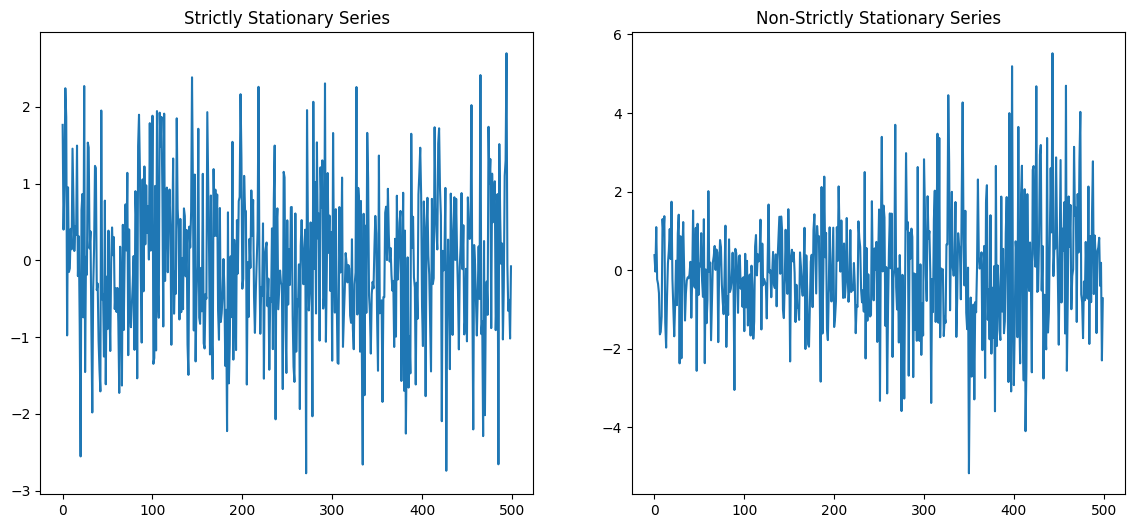

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest , ks_2samp

#Generating synthetic data for demonstaration
np.random.seed(0)
n=500

#Strictly stationary series: normally distributed random noise
strict_stationary_series=np.random.normal(0,1,n)

#non-strictly stationary series: changing variance
non_strict_stationary_series=np.concatenate([
    np.random.normal(0,1,n//2),
    np.random.normal(0,2,n//2)
])

#Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
  split=len(series)//2
  series_first_half=series[:split]
  series_second_half=series[:split]
  stat, p_value=ks_2samp(series_first_half, series_second_half)
  return stat, p_value

#perform the K-S test on strictly stationary series
ks_stat_strict, ks_pvalue_strict= ks_test_stationarity(strict_stationary_series)

#Perform the K-S test on non_strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict= ks_test_stationarity(non_strict_stationary_series)

#Plotting the series
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(strict_stationary_series)
plt.title('Strictly Stationary Series')
plt.subplot(1,2,2)
plt.plot(non_strict_stationary_series)
plt.title('Non-Strictly Stationary Series')
plt.show()

